##Health Care Project : Mental Health in Tech Workspace

- We have performed data cleaning, EDA, Scaling, eliminating ouliers and ML model predictions on this data set. 
  * Problem statement- Binary classification problem (Classification predictive modeling)
  * Objective - To predict the employee needs mental health support or not. 

In [ ]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# IMPORTING DATASET

df = pd.read_csv('survey.csv')

# df.head()

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
description = {
"State" : "stat e where they belong",
"self_employed" : "Are you self emplyoed?",
"family_history" : "Do you have a family history of mental illness?",
"work_interfere": "If you have a mental health condition, do you feel that it interferes with your work?",
"no_employees": "How many employees does your company or organization have?",
"remote_work" : "Do you work remotely?",
"tech_company": "Is your employer primarily a tech company/organization?",
"benefits": "Does your employer provide mental health benefits?",
"care_options": "Do you know the options for mental health care your employer provides?",
"wellness_program": "Has your employer ever discussed mental health as part of an employee wellness program?",
"seek_help": "Does your employer provide resources to learn more about mental health issues and how to seek help?",
"anonymity": "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?",
"leave": "How easy is it for you to take medical leave for a mental health condition?",
"mental_health_consequence": "Do you think that discussing a mental health issue with your employer would have negative consequences?",
"phys_health_consequence": "Do you think that discussing a physical health issue with your employer would have negative consequences?",
"coworkers": "Would you be willing to discuss a mental health issue with your coworkers?",
"supervisor": "Would you be willing to discuss a mental health issue with your direct supervisor(s)?",
"mental_health_interview": "Would you bring up a mental health issue with a potential employer in an interview?",
"phys_health_interview": "Would you bring up a physical health issue with a potential employer in an interview?",
"mental_vs_physical": "Do you feel that your employer takes mental health as seriously as physical health?",
"obs_consequence": "Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?",
"comments": "Any additional notes or comments",
"treatment": "Have you sought treatment for a mental health condition?",
}

Variables explanation:

* Timestamp - It's shows when the actual survey has taken
* Age - Age of an person who are affected by mnetal illness
* Gender - male, female & agender
* Country - country where they belong
* State - state where they belong
* self_employed - Are you self emplyoed?
* family_history - Do you have a family history of mental illness?
* treatment - Have you sought treatment for a mental health condition?
* work_interfere - If you have a mental health condition, do you feel that it interferes with your work?
* no_employees - How many employees does your company or organization have?
* remote_work - Do you work remotely?
* tech_company - Is your employer primarily a tech company/organization?
* benefits - Does your employer provide mental health benefits?
* care_options - Do you know the options for mental health care your employer provides?
* wellness_program - Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help - Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave - How easy is it for you to take medical leave for a mental health condition?
* mental_health_consequence - Do you think that discussing a mental health issue with your employer would have negative consequences?
* phys_health_consequence -Do you think that discussing a physical health issue with your employer would have negative consequences?
* coworkers - Would you be willing to discuss a mental health issue with your coworkers
* supervisor - Would you be willing to discuss a mental health issue with your direct supervisor(s)?
* mental_health_interview - Would you bring up a mental health issue with a potential employer in an interview?
* phys_health_interview - Would you bring up a physical health issue with a potential employer in an interview?
* mental_vs_physical-Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence - Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* comments - Any additional notes or comments



In [ ]:
df.shape

(1259, 27)

In [ ]:
df.iloc[:,1:len(df)].describe() 

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
df.info

<bound method DataFrame.info of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment w

##Data Cleaning 

- What percentage of null values for each varible we have in our dataset? 

In [ ]:
allvariables= df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([allvariables, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

* As we can see four variables have null values; comments, state are contributing to a greater percentage of null values

As we are going to remove two columns(Timestamp&comments) to ease our lives while prediction. We choose to drop these columns as 75% of cells are null values and not impacting to our target feature.

In [ ]:
df = df.drop(['comments'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)
df.isnull().sum().max()
df.head(5)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
#let's check size of data set
print("We are dealing with %s rows and %s columns"%(df.shape[0],df.shape[1]))

We are dealing with 1259 rows and 25 columns


##Exploring variables

Plotting all variables and their responses

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

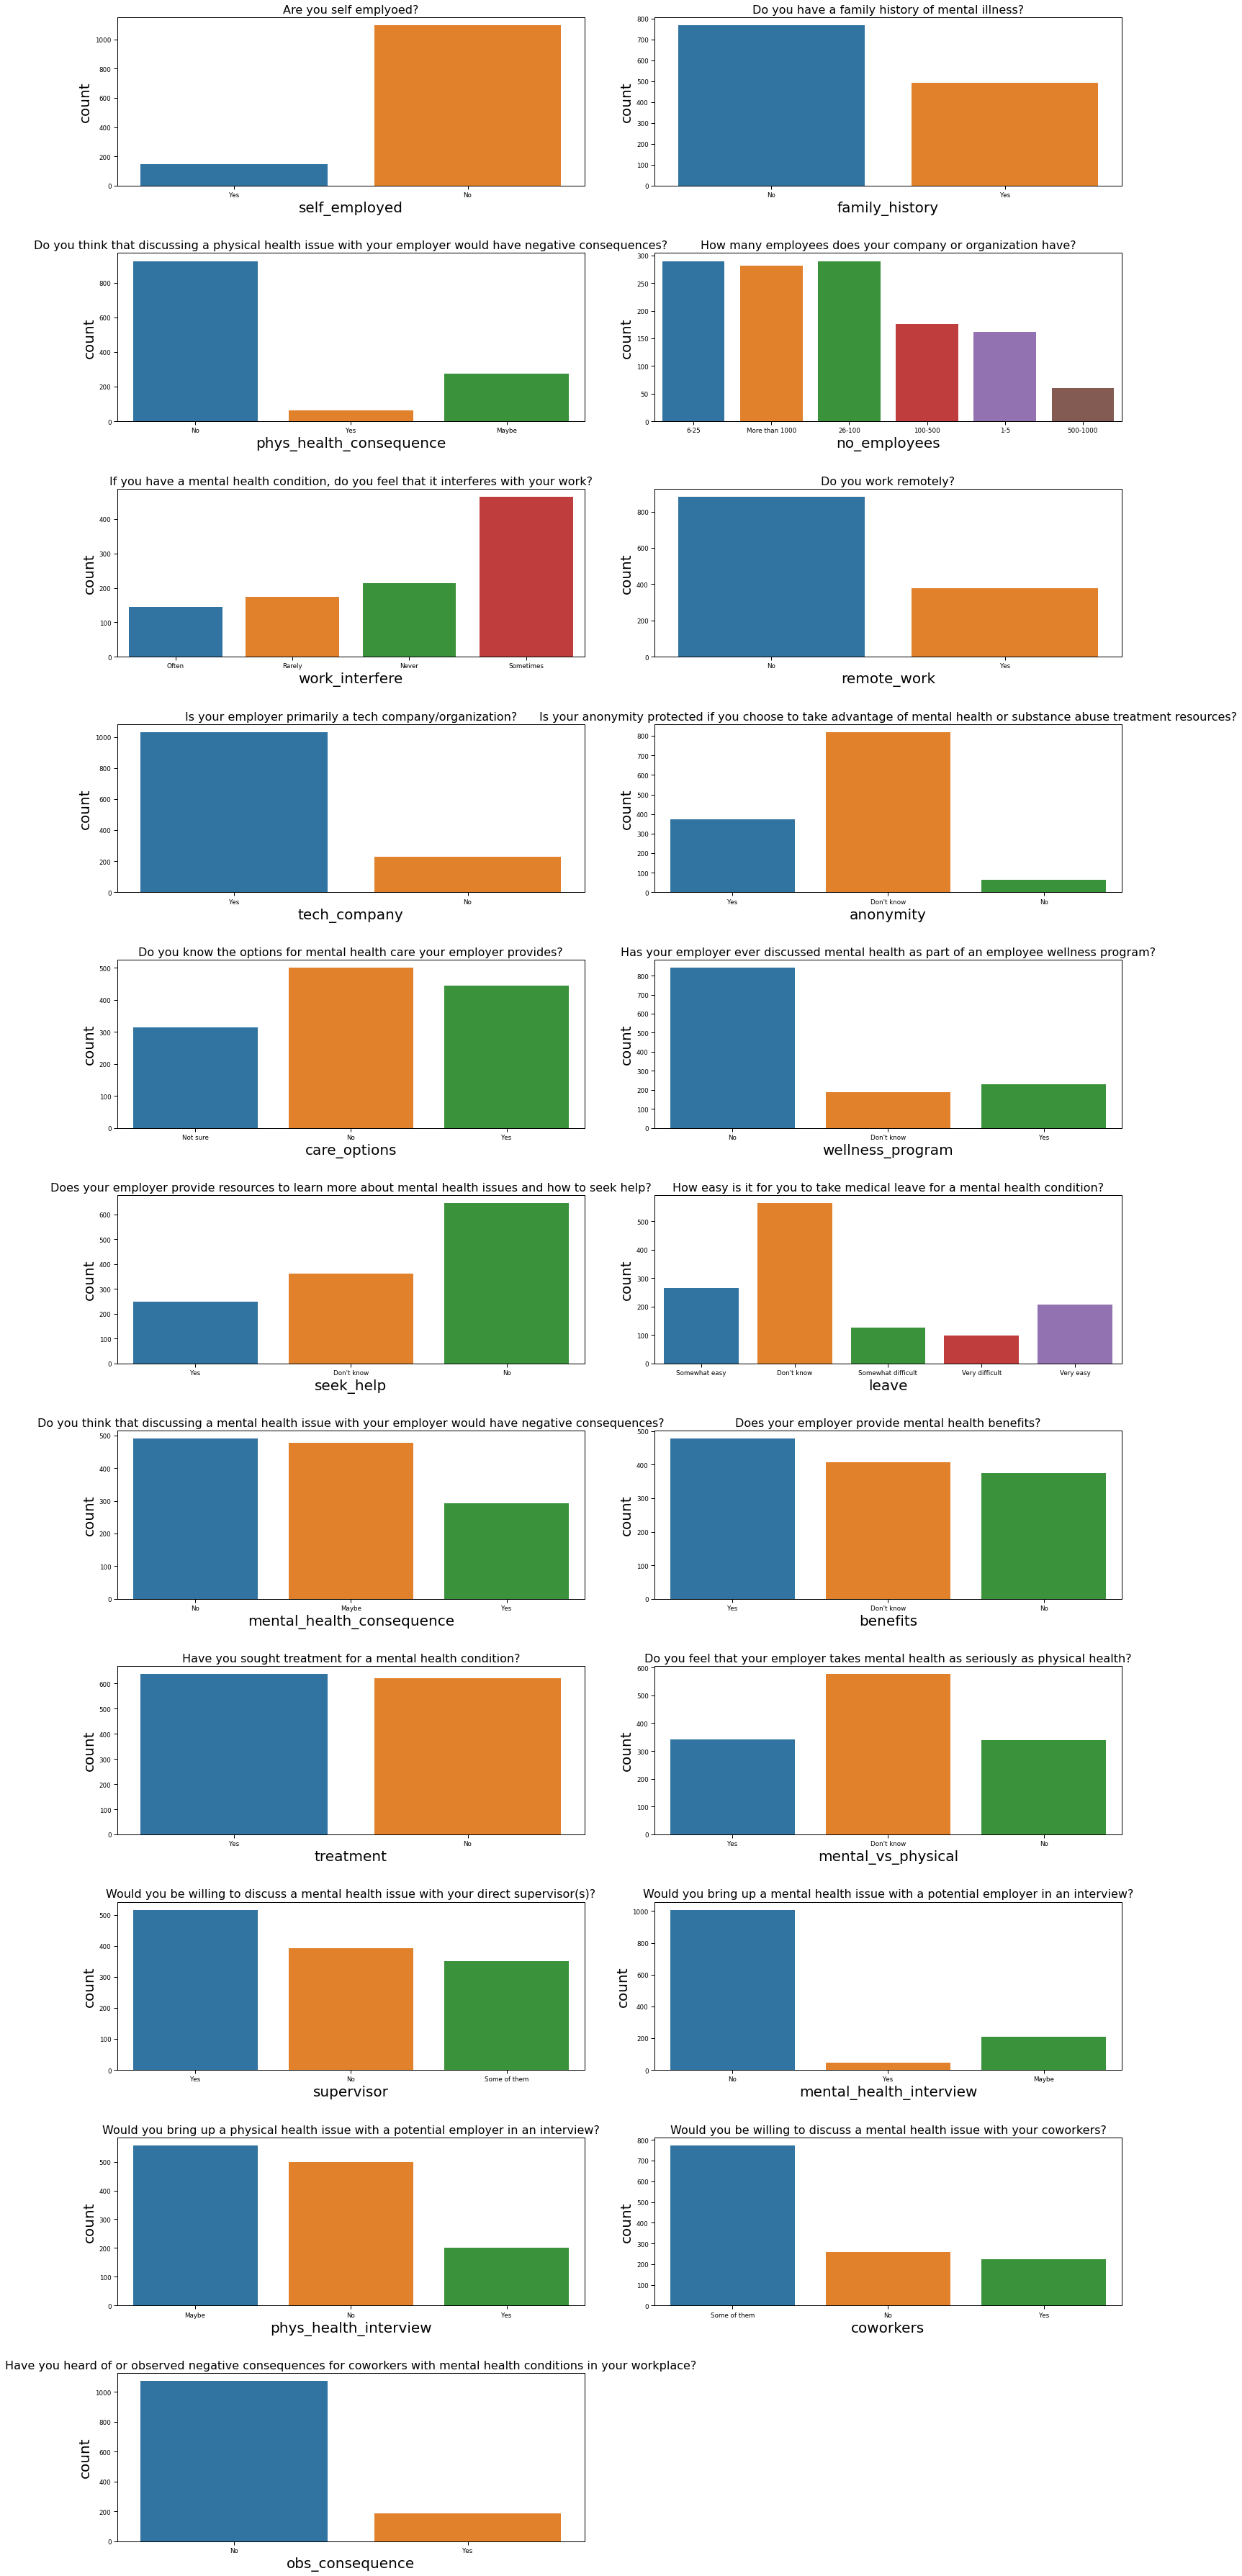

In [ ]:
pltvariables = ['self_employed', 'family_history', 'phys_health_consequence', 'no_employees', 'work_interfere', 'remote_work', 'tech_company', 'anonymity',
 'care_options', 'wellness_program', 'seek_help',  'leave', 'mental_health_consequence','benefits', 'treatment',
 'mental_vs_physical', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'coworkers', 'obs_consequence']
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":20}) 
fig = plt.figure()
fig.set_size_inches(25, 70.5)
fig.subplots_adjust(hspace=0.4, wspace=0.15)
for i in range(1, len(pltvariables)+1):
    ax = fig.add_subplot(12, 2, i)
    if pltvariables[i-1] in description:
        ax.title.set_text(description[pltvariables[i-1]])
    if pltvariables[i-1] == 'Age':
        sns.distplot(a=df['Age'], kde=False)
    else:
        sns.countplot(df.loc[:, pltvariables[i-1]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


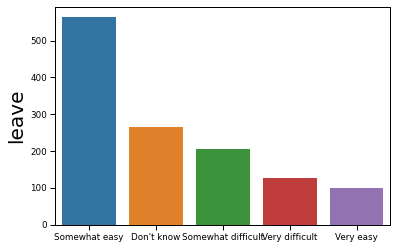

In [ ]:
sns.barplot(df['leave'].unique(),df['leave'].value_counts())

* Taking leaves has a good rate where most of the employees felt somewhat easy to take any sick leaves, which is a good sign for an organisation to leverage and control illness

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


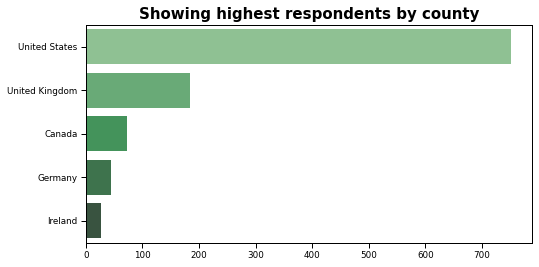

In [ ]:
top_countries = df['Country'].value_counts()[:5].to_frame()
plt.figure(figsize=(8,4))
sns.barplot(top_countries['Country'],top_countries.index,palette="Greens_d")
plt.title('Showing highest respondents by county',fontsize=15,fontweight="bold")
plt.xlabel('')
plt.show()

* Plotting to visualize the highest number of survey takers which is over 700 - United states has highest responders for the survey

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


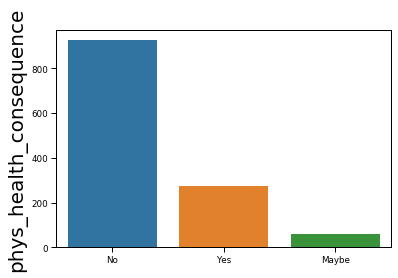

In [ ]:
sns.barplot(df['phys_health_consequence'].unique(),df['phys_health_consequence'].value_counts())

* Most of the employees voted no for this, as this states most of the employers are feeling free to approach and dicuss their health with employers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


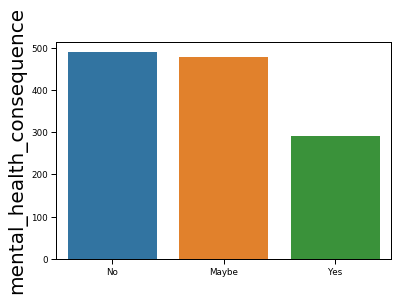

In [ ]:
sns.barplot(df['mental_health_consequence'].unique(),df['mental_health_consequence'].value_counts())

 * Most of the employees voted no for this, as this states most of the employers are feeling free to approach and dicuss their health with employers

###Handling Age Variable


- Finding outliers on AGE column

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


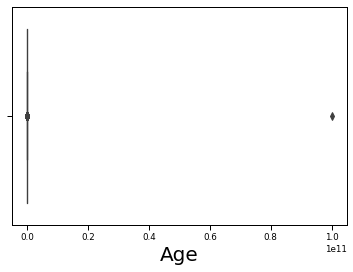

In [ ]:
sns.boxplot(df['Age'])

* As the above plot clearly shows we have outliers in our age column, because this is our most important feature in our dataset to predicit target

In [ ]:
df.Age[df.Age < 18] = 32
df.Age[df.Age > 65] = 32

<ipython-input-17-85957741be9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df.Age < 18] = 32
<ipython-input-17-85957741be9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df.Age > 65] = 32


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

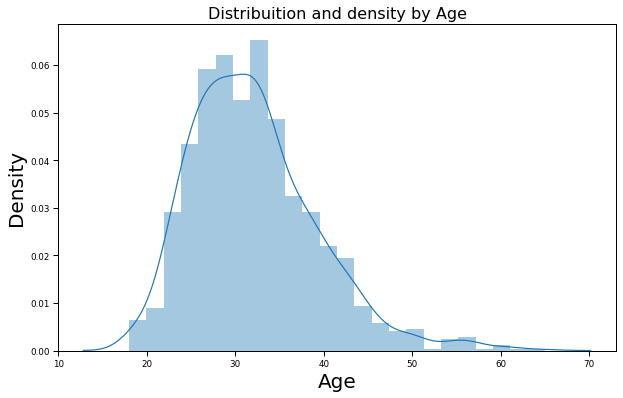

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

- Most people in this survey are in their early 30's and late 20's.

- Let's visualize the distribution of 'Age', by the categories of       'work_interfere'.

- But first, we should clean 'work_interfere'.

Clean 'work_interfere' Variable
  * This variable defines if you have a mental health issue, do you feel that it interferes with your work
  * We can think about this way the people who didn't respond to this question they do not have a mental health issue. We are going to fill all the NA's with 'dont know'

In [ ]:
df.work_interfere.fillna(value='Dont know',inplace=True)
df.work_interfere.value_counts()


Sometimes    465
Dont know    264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

Finding correlation for 'Age' Distribution and 'work_interfere'

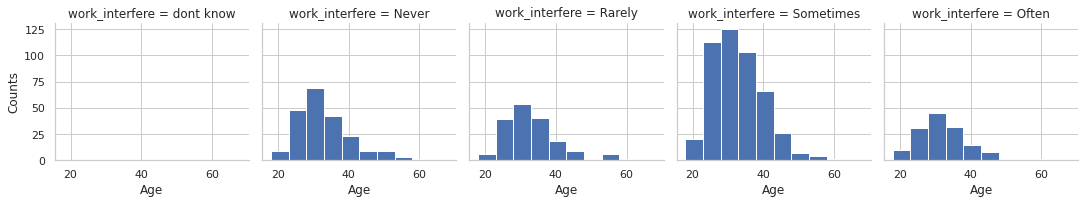

In [ ]:
sns.set(style="whitegrid")

ds = sns.FacetGrid(col='work_interfere', sharey=True,
                col_order=['dont know','Never','Rarely','Sometimes','Often'],
                data=df,despine=True)

ds = ds.map(plt.hist, 'Age', bins=np.arange(18,72,5))

ds = ds.set_ylabels('Counts')

plt.show()

 * There is no difference in age distribution while we compare it to work interfere, while they have work interfere at sometimes with their mental health illness. As we can see in all categories central tendecy is at 30's of age.

**Since most of the data is cateogorical, we are assigning default values for each variable based on their data type.**

In [ ]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe

intFeatures = ['Age']

stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']

floatFeatures = []


for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
        
df.head()

Error: Feature state not recognized.


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


###Handling Gender column
  * Gender is the most important variable as it's so effective on the mental health vary by gender?
  

In [ ]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

Gender column has vast groups so we trimmed it to three groups M, F, Trans

In [ ]:
#clean 'Gender'
#lower case all columm's elements
gender = df['Gender'].str.lower()

#Select unique elements
gender = df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]

trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           

female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)


stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


###EDA

Do feel that your employer takes mental health as seriously as physical health?'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


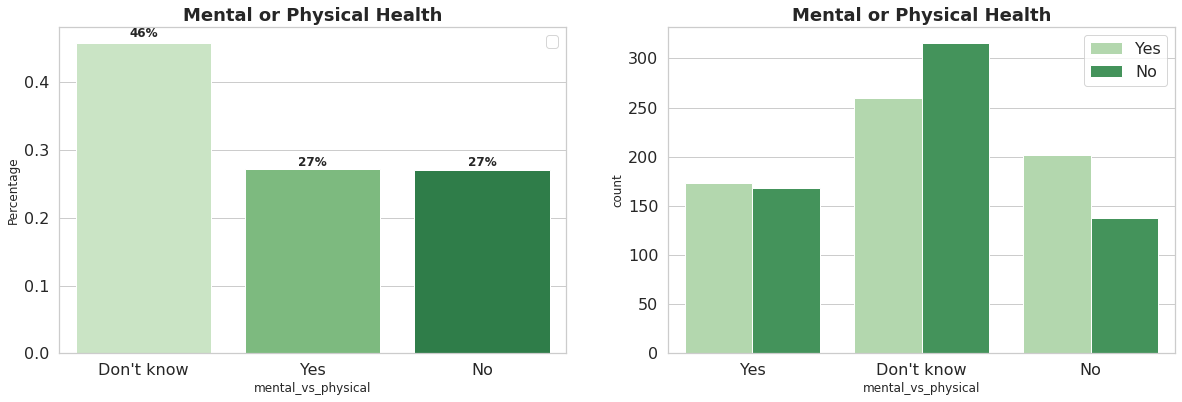

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_vs_physical'], hue = df['treatment'], palette='Greens')
plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

  - As we can see the greater percentage of people said they don't know and number of people who voted for both yes or no has almost equal.
  - For the people who answered Yes as well as the ones who answered No, more than 505 of them sought after medical help for their mental health, whereas it was not the case for the one's belonging to the 'Don't know' category.

Do you think that discussing a mental health issue with your employer would have negative consequences?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


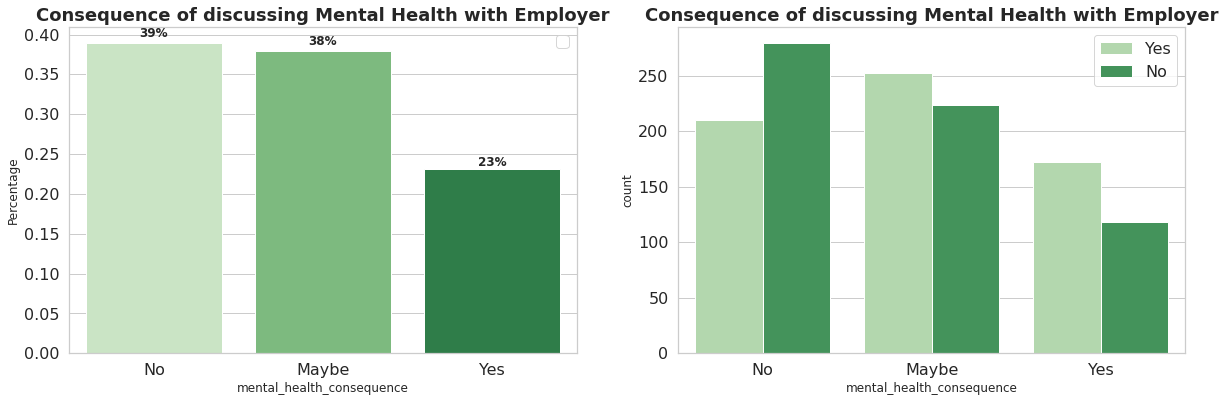

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_health_consequence'], hue = df['treatment'], palette='Greens')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

  - Around same number of people ( around 40% each ) answered Maybe as well as No for the negative impact of discussing mental health consequences with the employer.
  - As we can see around 23% of people voted that discussing their mental health with employer going to create negative impact on them.
- It is nice to know that out of the people who answered No, there were only around 40% of the people who actually sought after help.

Do you think that discussing a physical health issue with your employer would have negative consequences?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


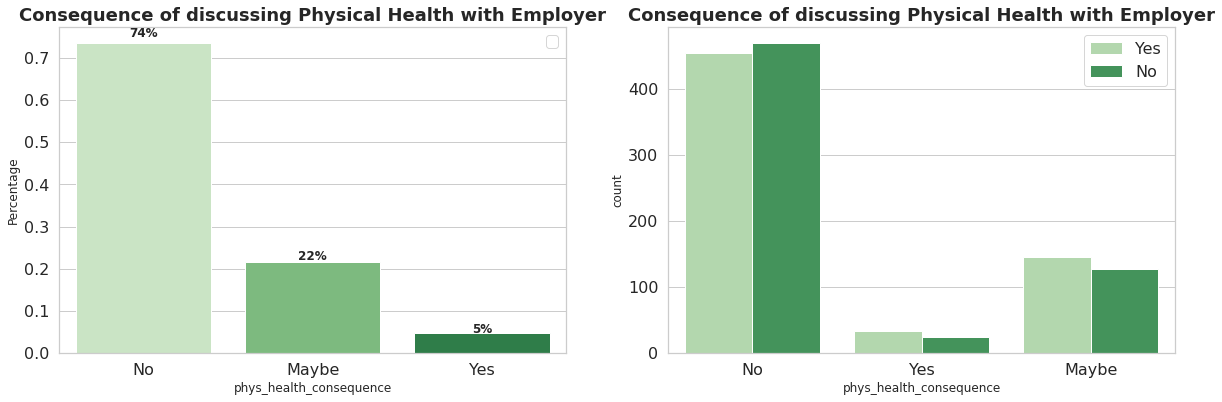

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['phys_health_consequence'], hue = df['treatment'], palette='Greens')
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

- Around 75% of the people voted no as they stated that physical health does not create a negative impact on their employer and only 5% of them voted for yes
- While it maybe incorrect for us to draw any conclusions about whether they seek mental help on the basis of their physical condition, because it is more or less same for all the three categories, we must keep in mind about how differently mental and physical health are treated as a whole.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


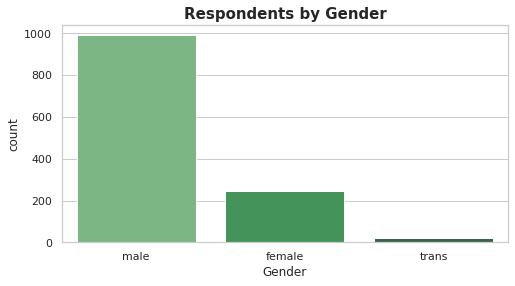

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot('Gender',data = df, order = df['Gender'].value_counts().index,palette="Greens_d")
plt.title("Respondents by Gender",fontsize=15,fontweight="bold")
plt.show()

As it shows there is greater percentage of male populations are respondents to the survey

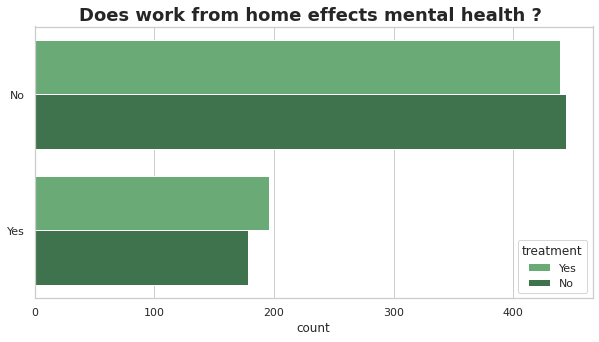

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y="remote_work", hue="treatment", data=df,palette="Greens_d")
plt.title("Does work from home effects mental health ? ",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()

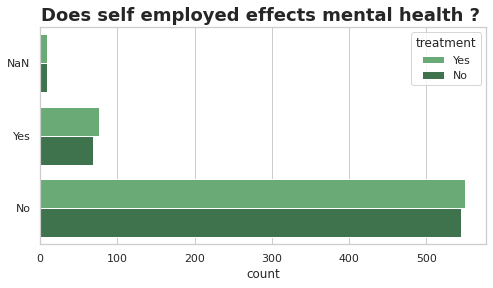

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(y="self_employed", hue="treatment", data=df,palette="Greens_d")
plt.title("Does self employed effects mental health ? ",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()

###Preprocessing the data to label encode all the variables on categorical basis so that we can implemnet ML models

In [ ]:
from sklearn import preprocessing

labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
# df = df.drop(['Country'], axis= 1)
# df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_state ['AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',

<ipython-input-30-9854239e50bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.transform(df[feature])


In [ ]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19,0,44,10,0,0,1,2,4,0,...,2,2,1,1,1,2,1,0,2,0
1,26,1,44,11,0,0,0,3,5,0,...,0,0,0,1,0,0,1,1,0,0
2,14,1,6,45,0,0,0,3,4,0,...,0,1,1,1,2,2,2,2,1,0
3,13,1,43,45,0,1,1,2,2,0,...,1,1,2,2,1,0,0,0,1,1
4,13,1,44,37,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


## Machine learning Model developement for Classification problem

In [ ]:
from sklearn.model_selection import train_test_split

# # define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere','obs_consequence']
X = df[feature_cols]
y = df.treatment

 # split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)



In [ ]:
print('dataset training :')
print(X_train.shape)
print(y_train.shape)
print('dataset testing :')
print(X_test.shape)
print(y_test.shape)

dataset training :
(1005, 9)
(1005,)
dataset testing :
(252, 9)
(252,)


#### Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
y_pred_class = logreg.predict(X_test)    


print("Training Accuracy: ",logreg.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)

Training Accuracy:  0.8238805970149253
Test Accuracy:  0.7857142857142857


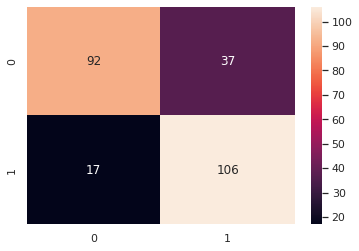

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_class),annot=True,fmt='g')

#### K-Nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
    
print("Training Accuracy: ",knn.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

cm = confusion_matrix(y_test, y_pred_class)

Training Accuracy:  0.8
Test Accuracy:  0.753968253968254


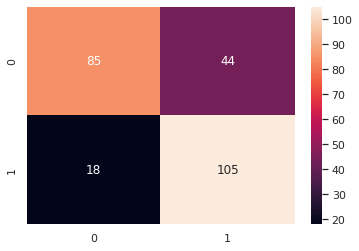

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_class),annot=True,fmt='g')

#### Decision tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "gini")
dtc.fit(X_train, y_train)

y_pred_class = dtc.predict(X_test)

print("Training Accuracy: ",dtc.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

cm = confusion_matrix(y_test, y_pred_class)

Training Accuracy:  0.9890547263681592
Test Accuracy:  0.7619047619047619


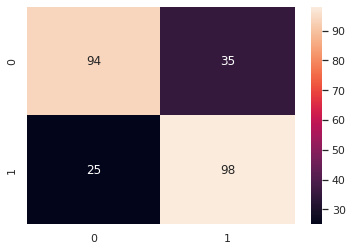

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_class),annot=True,fmt='g')

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30,criterion='entropy')
rfc.fit(X_train, y_train)

y_pred_class = rfc.predict(X_test)


print("Training Accuracy: ",rfc.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

cm = confusion_matrix(y_test, y_pred_class)

Training Accuracy:  0.9870646766169154
Test Accuracy:  0.8333333333333334


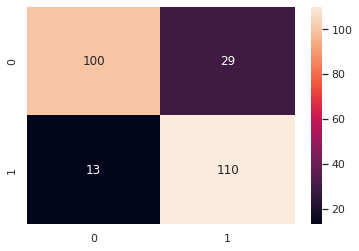

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_class),annot=True,fmt='g')

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

gbc.fit(X_train, y_train)

y_pred_class = gbc.predict(X_test)


print("Training Accuracy: ",gbc.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

cm = confusion_matrix(y_test, y_pred_class)


Training Accuracy:  0.9651741293532339
Test Accuracy:  0.8095238095238095


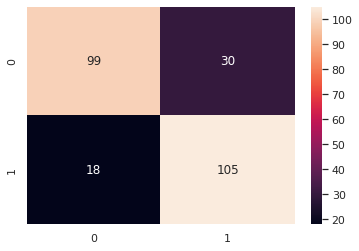

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_class),annot=True,fmt='g')

### SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
sv = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = sv.fit(X_train, y_train)

# Predicting the Test set results 
y_pred_class = model.predict(X_test)
# y_pred

print("Training Accuracy: ",model.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

cm = confusion_matrix(y_test, y_pred_class)

Training Accuracy:  0.8378109452736319
Test Accuracy:  0.7857142857142857


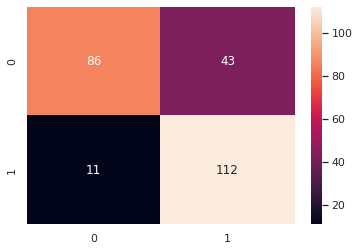

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_class),annot=True,fmt='g')

## Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
    
y_pred_class = nb.predict(X_test)    


print("Training Accuracy: ",nb.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)

Training Accuracy:  0.8029850746268656
Test Accuracy:  0.7658730158730159


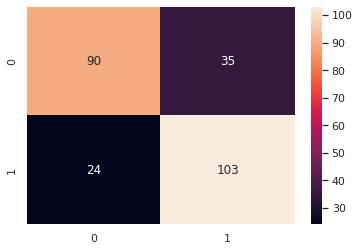

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_class),annot=True,fmt='g')

As we have used 7 models to see the accuracy while testing our model on new data among these. Random forest has the best Test accuracy 

### Normalization of data


* Separating Features and target

In [ ]:
y = df.treatment.values
x_data = df.drop(['treatment'], axis=1)

Normalization process

In [ ]:
X = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
X.head()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.441860,0.0,0.956522,0.222222,0.0,0.0,0.50,0.8,0.0,1.0,...,1.0,0.50,0.5,0.5,0.5,1.0,0.5,0.0,1.0,0.0
1,0.604651,0.5,0.956522,0.244444,0.0,0.0,0.75,1.0,0.0,0.0,...,0.0,0.00,0.0,0.5,0.0,0.0,0.5,0.5,0.0,0.0
2,0.325581,0.5,0.130435,1.000000,0.0,0.0,0.75,0.8,0.0,1.0,...,0.0,0.25,0.5,0.5,1.0,1.0,1.0,1.0,0.5,0.0
3,0.302326,0.5,0.934783,1.000000,0.0,1.0,0.50,0.4,0.0,1.0,...,0.5,0.25,1.0,1.0,0.5,0.0,0.0,0.0,0.5,1.0
4,0.302326,0.5,0.956522,0.822222,0.0,0.0,0.25,0.2,1.0,1.0,...,0.0,0.00,0.5,0.5,0.5,1.0,1.0,1.0,0.0,0.0


Model evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=789)


Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
y_pred_class = logreg.predict(X_test)    


print("Training Accuracy: ",logreg.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)

Training Accuracy:  0.8238805970149253
Test Accuracy:  0.7857142857142857


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30,criterion='entropy')
rfc.fit(X_train, y_train)

y_pred_class = rfc.predict(X_test)


print("Training Accuracy: ",rfc.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

cm = confusion_matrix(y_test, y_pred_class)

Training Accuracy:  0.9990049751243781
Test Accuracy:  0.7738095238095238


K-Nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
    
print("Training Accuracy: ",knn.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.8119402985074626
Test Accuracy:  0.7579365079365079


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "gini")
dtc.fit(X_train, y_train)

y_pred_class = dtc.predict(X_test)

print("Training Accuracy: ",dtc.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  1.0
Test Accuracy:  0.7261904761904762


Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

gbc.fit(X_train, y_train)

y_pred_class = gbc.predict(X_test)


print("Training Accuracy: ",gbc.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  1.0
Test Accuracy:  0.7658730158730159


Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
    
y_pred_class = nb.predict(X_test)    


print("Training Accuracy: ",nb.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

Training Accuracy:  0.8029850746268656
Test Accuracy:  0.7658730158730159


In [ ]:
sv = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = sv.fit(X_train, y_train)

# Predicting the Test set results 
y_pred_class = model.predict(X_test)
# y_pred

print("Training Accuracy: ",model.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.891542288557214
Test Accuracy:  0.7698412698412699


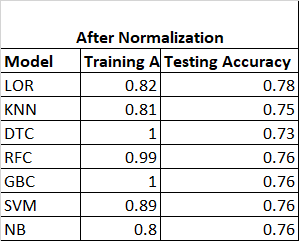